<a href="https://colab.research.google.com/github/swami-gait/Foundations_of_datascience/blob/master/FDS_WK12_DataViz.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [790]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import style
plt.style.use(['dark_background'])
import seaborn as sns
sns.set(color_codes=True)

## Plotting the composition of data

### Static  Composition

In [791]:
p=sns.load_dataset('penguins')

In [792]:
p.head()

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE


In [793]:
c=p.groupby(by='species')['species'].count()

#### Pie Charts

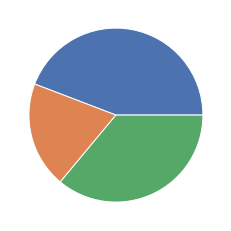

In [794]:
plt.pie(c);

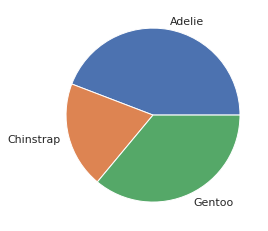

In [795]:
plt.pie(c,labels=c.index);

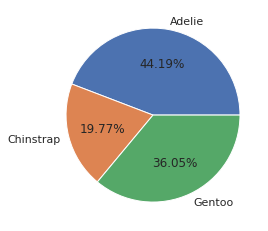

In [796]:
plt.pie(c,labels=c.index,autopct="%.2f%%");

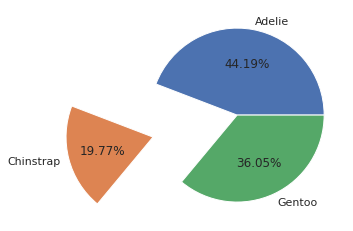

In [797]:
plt.pie(c,labels=c.index,autopct="%.2f%%",explode=[0,1,0]);

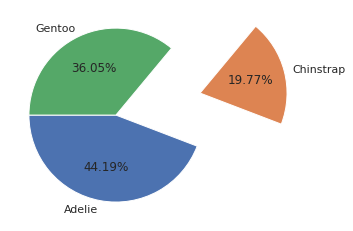

In [798]:
plt.pie(c,labels=c.index,autopct="%.2f%%",explode=[0,1,0],startangle=180);

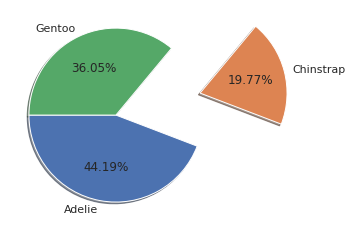

In [799]:
plt.pie(c,labels=c.index,autopct="%.2f%%",explode=[0,1,0],startangle=180,shadow=True);

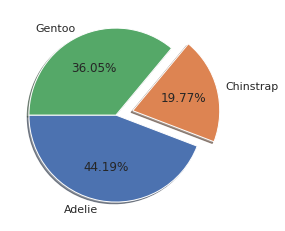

In [800]:
plt.pie(c,labels=c.index,autopct="%.2f%%",explode=[0,0.2,0],startangle=180,shadow=True);

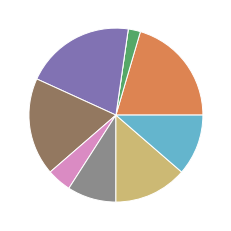

In [801]:
plt.pie(np.random.randint(0,10,10));

####Donut charts


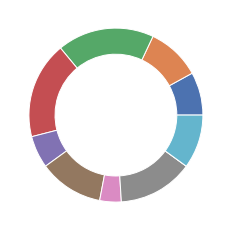

In [802]:
plt.pie(np.random.randint(0,10,10),wedgeprops=dict(width=0.3));

In [803]:
cmap = plt.get_cmap('Accent')
my_colours = cmap(np.arange(10))

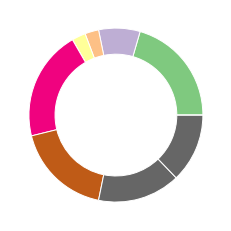

In [804]:
plt.pie(np.random.randint(0,10,10),wedgeprops=dict(width=0.3),colors=my_colours);

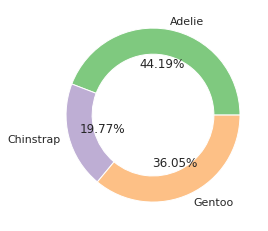

In [805]:
plt.pie(c,labels=c.index,autopct="%.2f%%",wedgeprops=dict(width=0.3),colors=my_colours);

In [806]:
c_i=p.groupby(by='island')['island'].count()

In [807]:
c_i

island
Biscoe       168
Dream        124
Torgersen     52
Name: island, dtype: int64

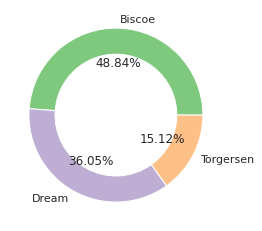

In [808]:
plt.pie(c_i,labels=c_i.index,autopct="%.2f%%",wedgeprops=dict(width=0.3),colors=my_colours);

In [809]:
c = pd.crosstab(p.species,p.island)

In [810]:
c = c.T

In [811]:
c

species,Adelie,Chinstrap,Gentoo
island,,,
Biscoe,44,0,124
Dream,56,68,0
Torgersen,52,0,0


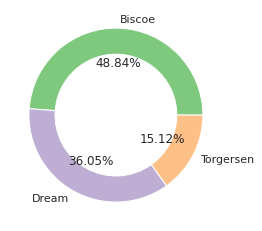

In [812]:
plt.pie(c.sum(axis=1),labels=c.index,radius=1,autopct="%.2f%%",wedgeprops=dict(width=0.3),colors=my_colours);

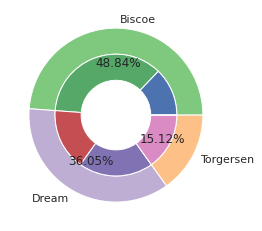

In [813]:
plt.pie(c.sum(axis=1),labels=c.index,radius=1,autopct="%.2f%%",wedgeprops=dict(width=0.3),colors=my_colours);
plt.pie(c.values.flatten(),radius=0.7,wedgeprops=dict(width=0.3));

In [814]:
cmap = plt.get_cmap('tab20c')
outer_colors=cmap(np.array([0,4,8]))
inner_colors = cmap(np.array([1,2,3,5,6,7,9,10,11]))

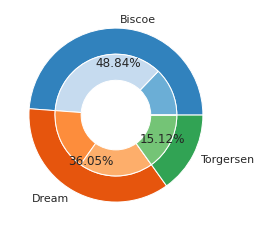

In [815]:
plt.pie(c.sum(axis=1),labels=c.index,radius=1,autopct="%.2f%%",wedgeprops=dict(width=0.3),colors=outer_colors);
plt.pie(c.values.flatten(),radius=0.7,wedgeprops=dict(width=0.3),colors=inner_colors);

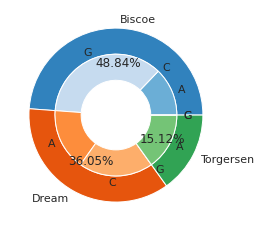

In [816]:
plt.pie(c.sum(axis=1),labels=c.index,radius=1,autopct="%.2f%%",wedgeprops=dict(width=0.3),colors=outer_colors);
plt.pie(c.values.flatten(),radius=0.7,wedgeprops=dict(width=0.3),colors=inner_colors,labels=['A','C','G','A','C','G','A','C','G']);

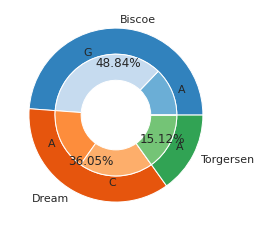

In [817]:
plt.pie(c.sum(axis=1),labels=c.index,radius=1,autopct="%.2f%%",wedgeprops=dict(width=0.3),colors=outer_colors);
plt.pie(c.values.flatten(),radius=0.7,wedgeprops=dict(width=0.3),colors=inner_colors,labels=['A','','G','A','C','','A','','']);

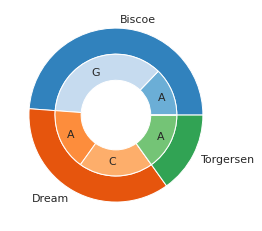

In [818]:
plt.pie(c.sum(axis=1),labels=c.index,radius=1,wedgeprops=dict(width=0.3),colors=outer_colors);
plt.pie(c.values.flatten(),radius=0.7,wedgeprops=dict(width=0.3),colors=inner_colors,labels=['A','','G','A','C','','A','',''],labeldistance=0.75);

#### Stacked bar plots

In [819]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import urllib.request
import json
from matplotlib import style
plt.style.use(['dark_background'])
sns.set(color_codes=True)

In [820]:
url = 'https://api.covid19india.org/states_daily.json'
urllib.request.urlretrieve(url,'data.json');
with open('data.json') as f:
    data = json.load(f)
data = data['states_daily']
df = pd.json_normalize(data)

In [821]:
df_ = df.tail(3)
df_.drop('date',axis=1,inplace=True)
df_.set_index('status',inplace=True)
df_=df_.T
df_ = df_.apply(pd.to_numeric)
df_.drop('tt',inplace=True)

/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [822]:
df_.head()

status,Confirmed,Recovered,Deceased
an,46,99,1
ap,6780,7866,82
ar,40,85,0
as,2792,1519,8
br,2525,4140,5


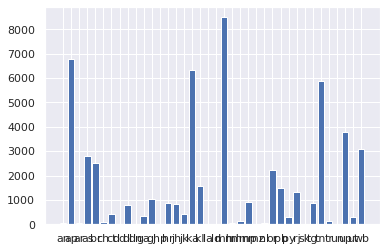

In [823]:
plt.bar(df_.index,df_.Confirmed);

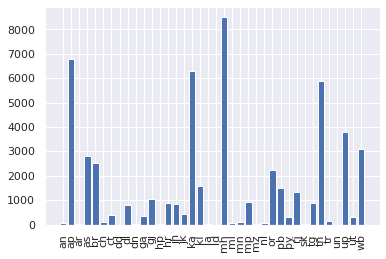

In [824]:
plt.bar(df_.index,df_.Confirmed);
plt.xticks(rotation=90);

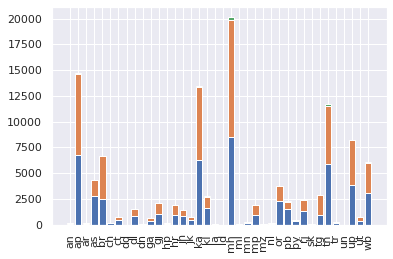

In [825]:
plt.bar(df_.index,df_.Confirmed);
plt.bar(df_.index,df_.Recovered, bottom=df_.Confirmed);
plt.bar(df_.index,df_.Deceased, bottom=df_.Confirmed +df_.Recovered);
plt.xticks(rotation=90);

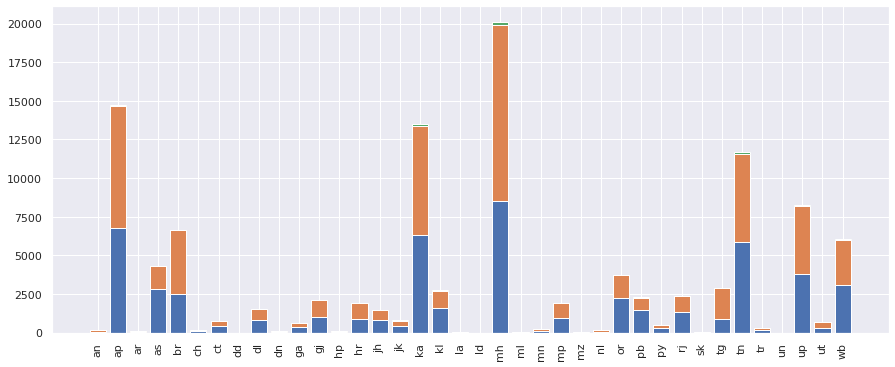

In [826]:
fig = plt.gcf()
fig.set_size_inches(15,6)
plt.bar(df_.index,df_.Confirmed);
plt.bar(df_.index,df_.Recovered, bottom=df_.Confirmed);
plt.bar(df_.index,df_.Deceased, bottom=df_.Confirmed +df_.Recovered);
plt.xticks(rotation=90);

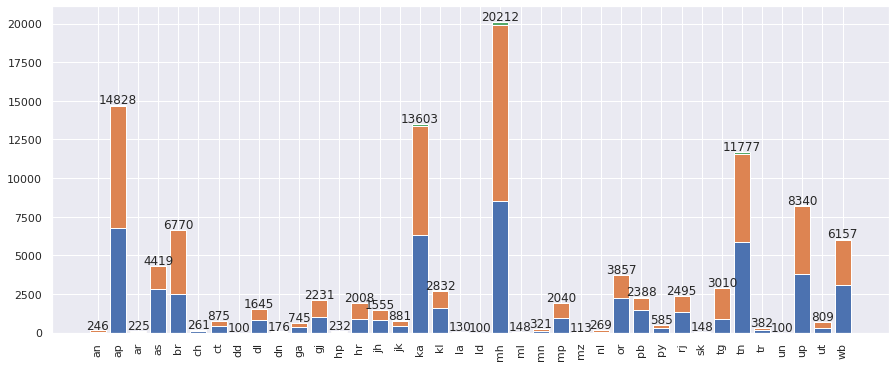

In [827]:
fig = plt.gcf()
fig.set_size_inches(15,6)
plt.bar(df_.index,df_.Confirmed);
plt.bar(df_.index,df_.Recovered, bottom=df_.Confirmed);
plt.bar(df_.index,df_.Deceased, bottom=df_.Confirmed + df_.Recovered);
plt.xticks(rotation=90);
for i,val in enumerate(df_.index):
    y = df_.loc[val].sum()+100
    x = i
    plt.text(x,y,str(y),ha='center');


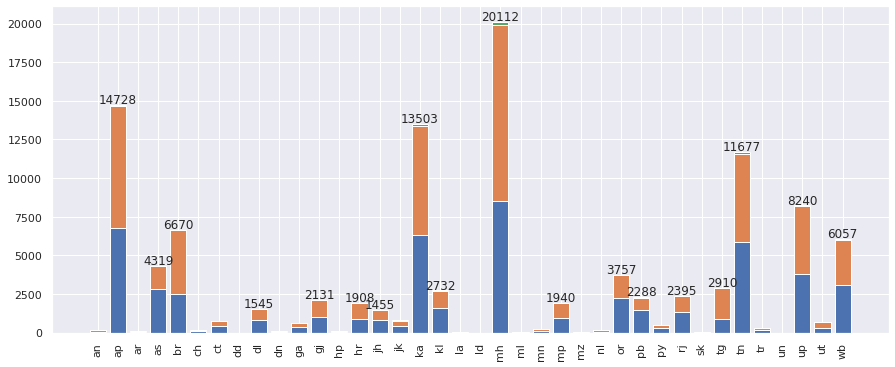

In [828]:
fig = plt.gcf()
fig.set_size_inches(15,6)
plt.bar(df_.index,df_.Confirmed);
plt.bar(df_.index,df_.Recovered, bottom=df_.Confirmed);
plt.bar(df_.index,df_.Deceased, bottom=df_.Confirmed + df_.Recovered);
plt.xticks(rotation=90);
for i,val in enumerate(df_.index):
    y = df_.loc[val].sum()
    if y >1000:
        x = i
        plt.text(x,y+100,str(y),ha='center');


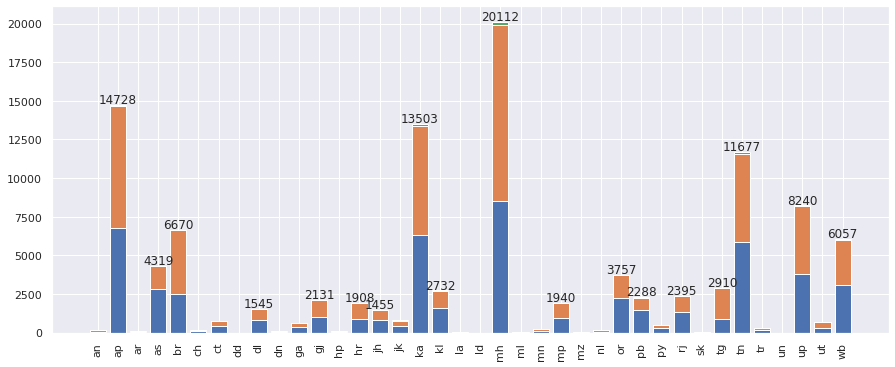

In [829]:
fig = plt.gcf()
fig.set_size_inches(15,6)
plt.bar(df_.index,df_.Confirmed);
plt.bar(df_.index,df_.Recovered, bottom=df_.Confirmed);
plt.bar(df_.index,df_.Deceased, bottom=df_.Confirmed + df_.Recovered);
plt.xticks(rotation=90);
for i,val in enumerate(df_.index):
    y = df_.loc[val].sum()
    if y >1000:
        x = i
        plt.text(x,y+100,str(y),ha='center');

#### Relative Stacked **plot**

In [830]:
df_.head()

status,Confirmed,Recovered,Deceased
an,46,99,1
ap,6780,7866,82
ar,40,85,0
as,2792,1519,8
br,2525,4140,5


In [831]:
df_['total'] = df_.sum(axis=1)

In [832]:
df_['Conf_ratio'] = df_['Confirmed']/df_['total']
df_['Reco_ratio'] = df_['Recovered']/df_['total']
df_['Decsd_ratio'] = df_['Deceased']/df_['total']

"for i,val in enumerate(df_.index):\n    y = df_.['total']\n    if y >1000:\n        x = i\n        plt.text(x,y+100,str(y),ha='center');"

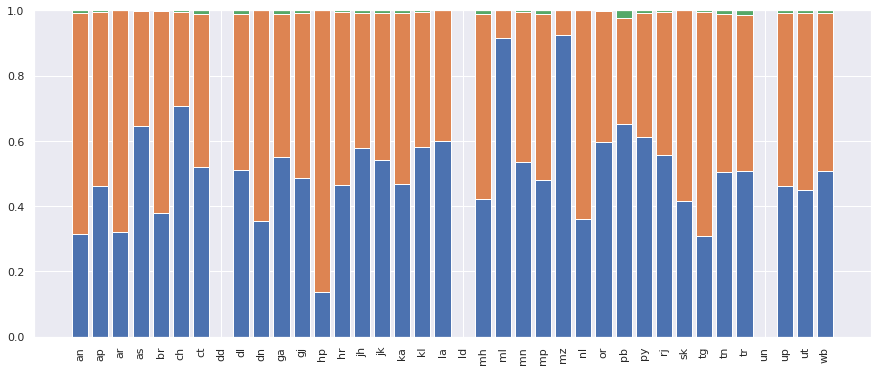

In [833]:
fig = plt.gcf()
fig.set_size_inches(15,6)
plt.bar(df_.index,df_.Conf_ratio);
plt.bar(df_.index,df_.Reco_ratio, bottom=df_.Conf_ratio);
plt.bar(df_.index,df_.Decsd_ratio, bottom=df_.Conf_ratio + df_.Reco_ratio);
plt.xticks(rotation=90);
'''for i,val in enumerate(df_.index):
    y = df_.['total']
    if y >1000:
        x = i
        plt.text(x,y+100,str(y),ha='center');'''

In [834]:
df_ = df_.sort_values('Conf_ratio',ascending=False)

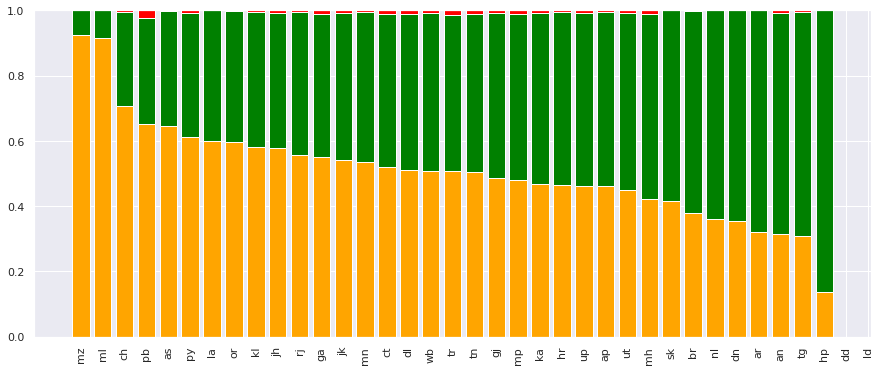

In [835]:
fig = plt.gcf()
fig.set_size_inches(15,6)
plt.bar(df_.index,df_.Conf_ratio,color = 'orange');
plt.bar(df_.index,df_.Reco_ratio, bottom=df_.Conf_ratio,color='green');
plt.bar(df_.index,df_.Decsd_ratio, bottom=df_.Conf_ratio + df_.Reco_ratio,color='red');
plt.xticks(rotation=90);

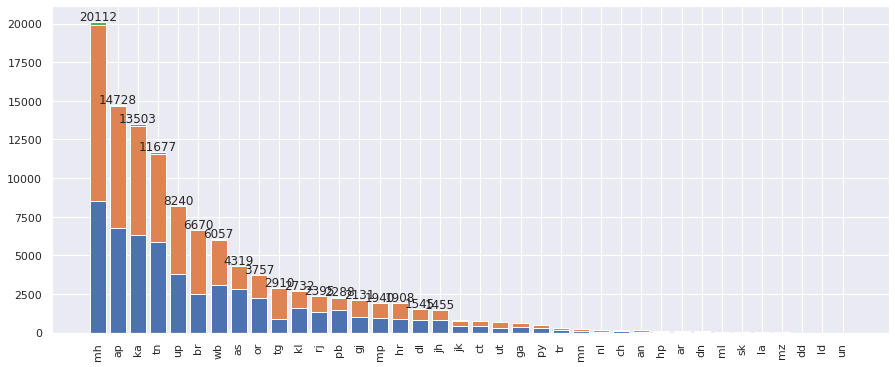

In [836]:
df_ = df_.sort_values('total',ascending=False)
fig = plt.gcf()
fig.set_size_inches(15,6)
plt.bar(df_.index,df_.Confirmed);
plt.bar(df_.index,df_.Recovered, bottom=df_.Confirmed);
plt.bar(df_.index,df_.Deceased, bottom=df_.Confirmed + df_.Recovered);
plt.xticks(rotation=90);
for i,val in enumerate(df_.index):
    y = df_.loc[val,'total']
    if y >1000:
        x = i
        plt.text(x,y+100,str(y),ha='center');

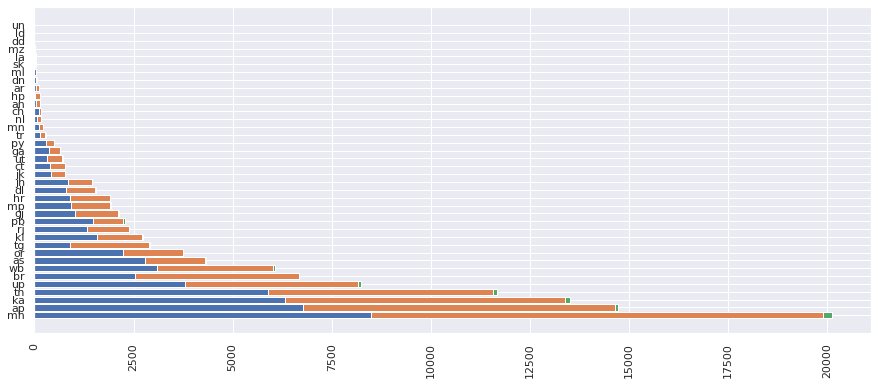

In [837]:
df_ = df_.sort_values('total',ascending=False)
fig = plt.gcf()
fig.set_size_inches(15,6)
plt.barh(df_.index,df_.Confirmed);
plt.barh(df_.index,df_.Recovered, left=df_.Confirmed);
plt.barh(df_.index,df_.Deceased, left=df_.Confirmed + df_.Recovered);
plt.xticks(rotation=90);

### Time varying composition of data


In [838]:
df_ = df[['mh','date','status']]

In [839]:
df_['mh']=pd.to_numeric(df_['mh'])
df_['date']=pd.to_datetime(df_['date'])

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [840]:
df_ = df_.pivot_table(values='mh',columns='status',index='date')

In [841]:
df_.head()

status,Confirmed,Deceased,Recovered
date,,,
2020-03-14,14,0,0
2020-03-15,18,0,0
2020-03-16,6,0,0
2020-03-17,3,1,0
2020-03-18,3,0,0


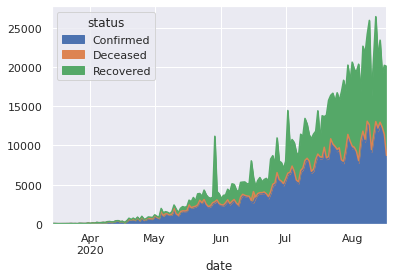

In [842]:
df_.plot.area();

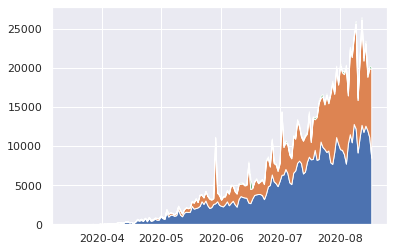

In [843]:
plt.stackplot(df_.index,df_.Confirmed,df_.Recovered,df_.Deceased);

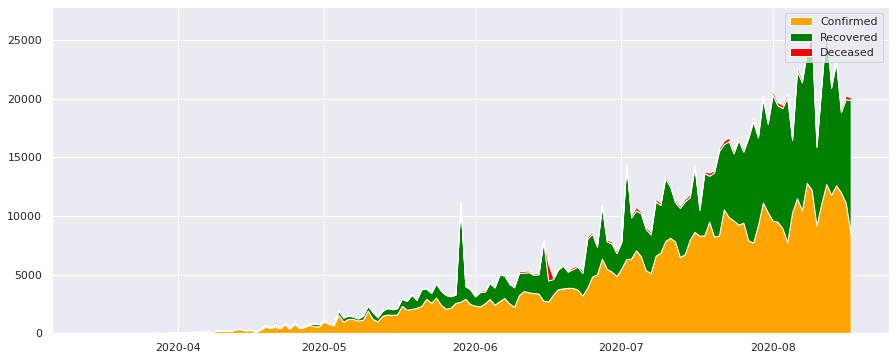

In [844]:
fig = plt.gcf()
fig.set_size_inches(15,6)
plt.stackplot(df_.index,df_.Confirmed,df_.Recovered,df_.Deceased,colors=['Orange','Green','Red'],labels=['Confirmed','Recovered','Deceased']);
plt.legend();


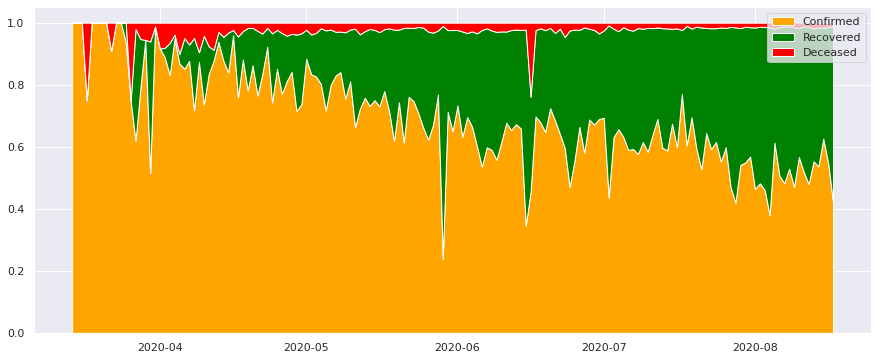

In [845]:
fig = plt.gcf()
fig.set_size_inches(15,6)
plt.stackplot(df_.index,df_.Confirmed/df_.sum(axis=1),df_.Recovered/df_.sum(axis=1),df_.Deceased/df_.sum(axis=1),colors=['Orange','Green','Red'],labels=['Confirmed','Recovered','Deceased']);
plt.legend();

In [846]:
def plot_stacked_area_by_state(state):
    df_ = df[[state,'date','status']]
    
    df_[state]=pd.to_numeric(df_[state])
    df_['date']=pd.to_datetime(df_['date'])
    df_ = df_.pivot_table(values= state,columns='status',index='date')
    
    fig = plt.gcf()
    fig.set_size_inches(15,6)
    plt.stackplot(df_.index,df_.Confirmed/df_.sum(axis=1),df_.Recovered/df_.sum(axis=1),df_.Deceased/df_.sum(axis=1),colors=['Orange','Green','Red'],labels=['Confirmed','Recovered','Deceased']);
    plt.legend();


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


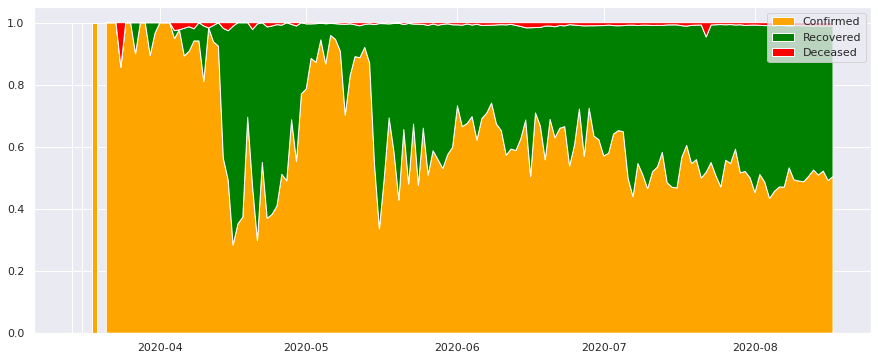

In [847]:
plot_stacked_area_by_state('tn')

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


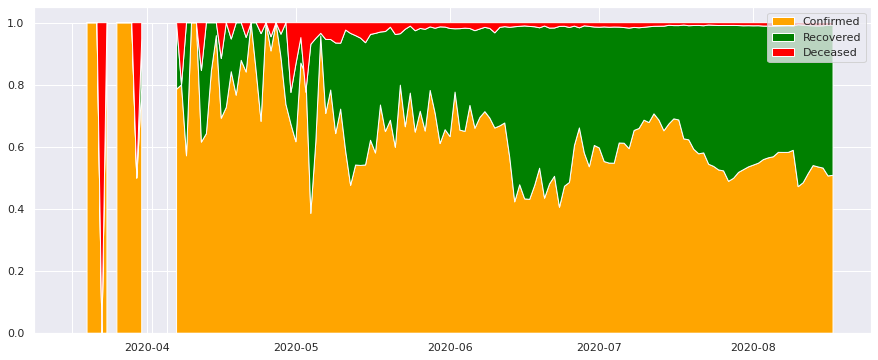

In [848]:
plot_stacked_area_by_state('wb')

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


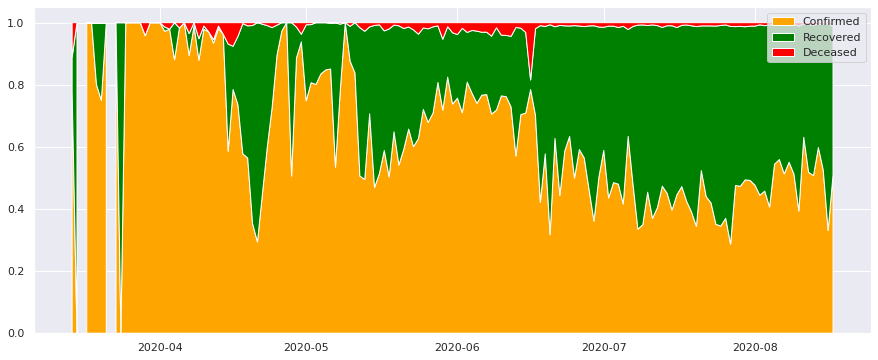

In [849]:
plot_stacked_area_by_state('dl')

## Plotting relationship between data

#### Scatter plot

In [850]:
t = sns.load_dataset('tips')

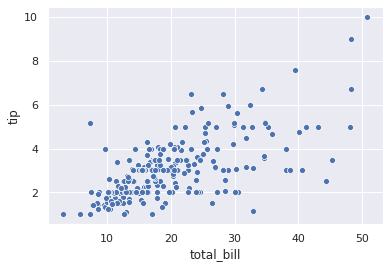

In [851]:
sns.scatterplot('total_bill','tip',data=t);

In [852]:
t['tip_fraction']=t['tip']/t['total_bill']

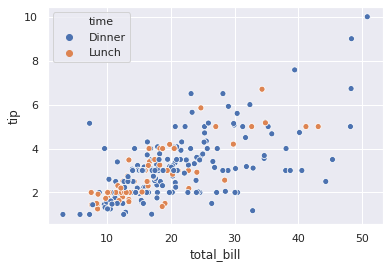

In [853]:
sns.scatterplot('total_bill','tip',data=t,hue='time');

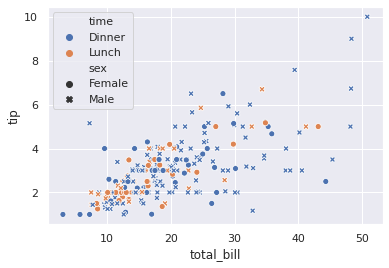

In [854]:
sns.scatterplot('total_bill','tip',data=t,hue='time',style='sex');

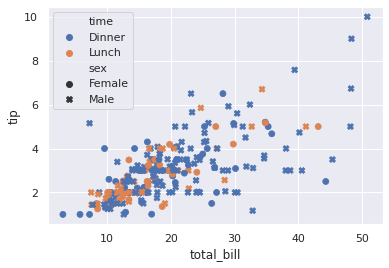

In [855]:
sns.scatterplot('total_bill','tip',data=t,hue='time',style='sex',marker='+');

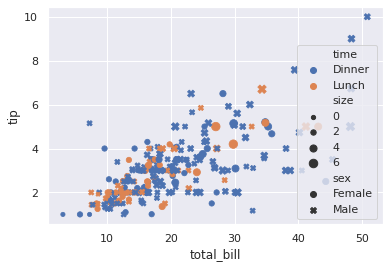

In [856]:
sns.scatterplot('total_bill','tip',data=t,hue='time',style='sex',marker='+',size='size');

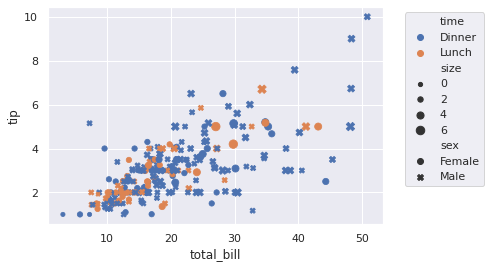

In [857]:
sns.scatterplot('total_bill','tip',data=t,hue='time',style='sex',marker='+',size='size');
plt.legend(bbox_to_anchor=(1.05,1));

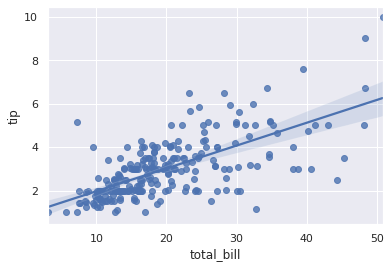

In [858]:
sns.regplot('total_bill','tip',data=t);

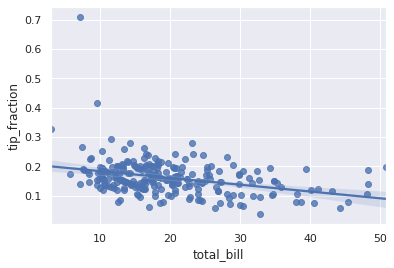

In [859]:
sns.regplot('total_bill','tip_fraction',data=t);

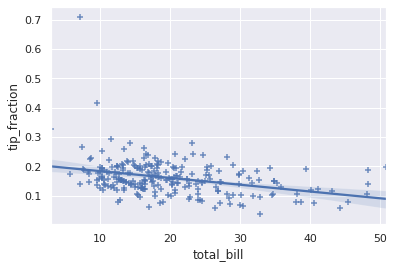

In [860]:
sns.regplot('total_bill','tip_fraction',data=t,marker = '+');

In [861]:
d=sns.load_dataset('diamonds')

In [862]:
d.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


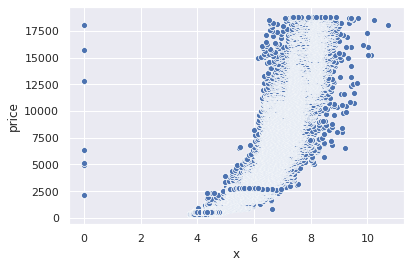

In [863]:
sns.scatterplot('x','price',data=d);

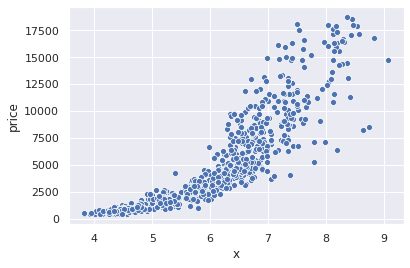

In [864]:
sns.scatterplot('x','price',data=d.sample(1000));

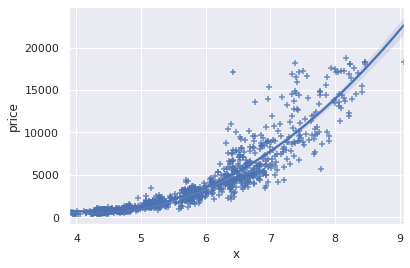

In [865]:
sns.regplot('x','price',data=d.sample(1000),order=2,marker='+');

#### Bar plots

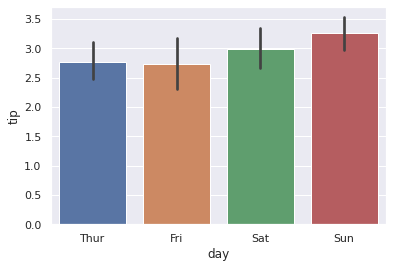

In [866]:
sns.barplot('day','tip',data=t);

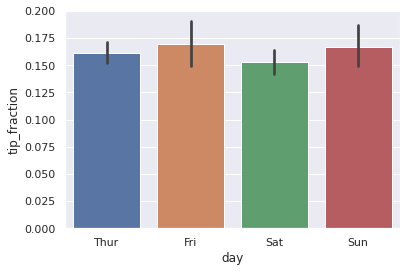

In [867]:
sns.barplot('day','tip_fraction',data=t);

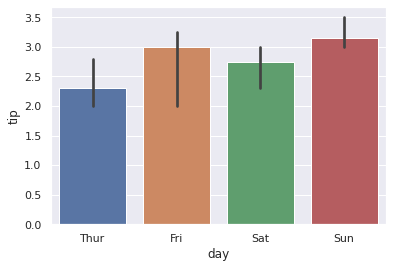

In [868]:
sns.barplot('day','tip',data=t,estimator=np.median);

In [869]:
def my_estimate(v):
    return(np.quantile(v,0.25))

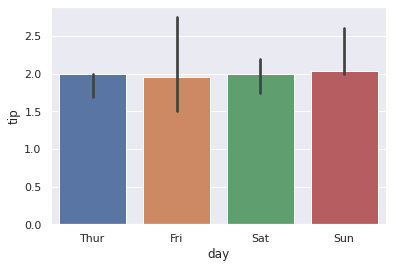

In [870]:
sns.barplot('day','tip',data=t,estimator=my_estimate);

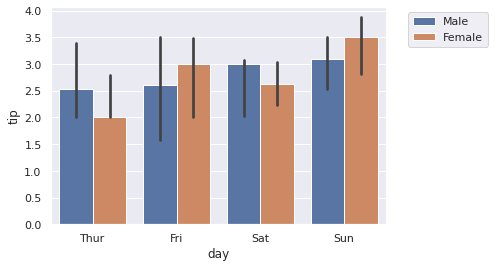

In [871]:
sns.barplot('day','tip',data=t,hue='sex',estimator=np.median);
plt.legend(bbox_to_anchor=(1.05,1))

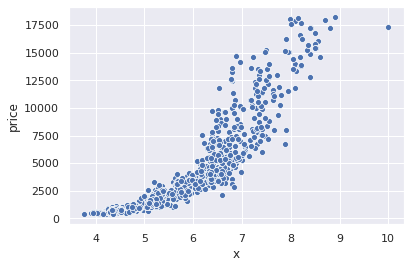

In [872]:
sns.scatterplot('x','price',data=d.sample(1000));

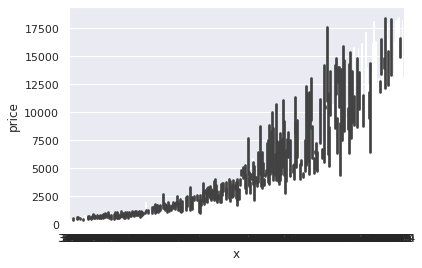

In [873]:
sns.barplot('x','price',data=d.sample(1000));

In [874]:
d['x_q']=pd.cut(d['x'],bins=7)

In [875]:
d.head()

,carat,cut,color,clarity,depth,table,price,x,y,z,x_q
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43,"(3.069, 4.603]"
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31,"(3.069, 4.603]"
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31,"(3.069, 4.603]"
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63,"(3.069, 4.603]"
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75,"(3.069, 4.603]"


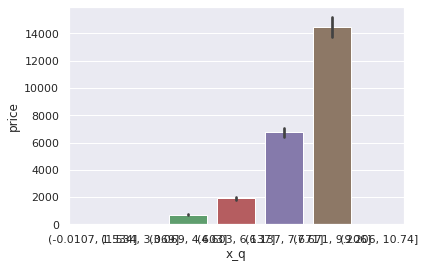

In [876]:
sns.barplot('x_q','price',data=d.sample(1000));

In [877]:
d['x_q']=pd.cut(d['x'],bins=15)

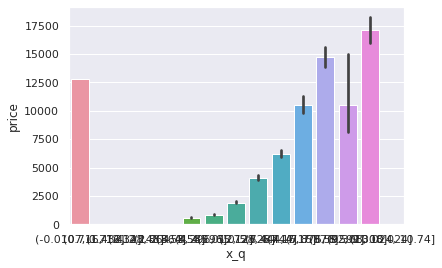

In [878]:
sns.barplot('x_q','price',data=d.sample(1000));

In [879]:
d['x_q']=pd.cut(d['x'],bins=15,labels=False)

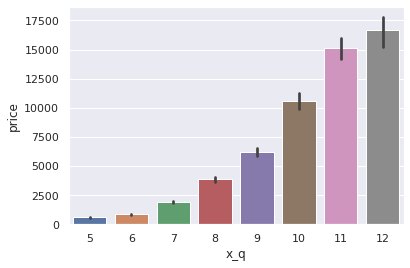

In [880]:
sns.barplot('x_q','price',data=d.sample(1000));

#### Line plots

In [881]:
f = sns.load_dataset('fmri')

In [882]:
f.head()

,subject,timepoint,event,region,signal
0,s13,18,stim,parietal,-0.017552
1,s5,14,stim,parietal,-0.080883
2,s12,18,stim,parietal,-0.081033
3,s11,18,stim,parietal,-0.046134
4,s10,18,stim,parietal,-0.037970


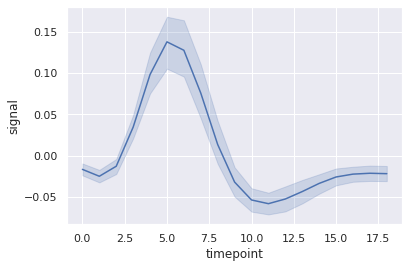

In [883]:
sns.lineplot('timepoint','signal',data=f);

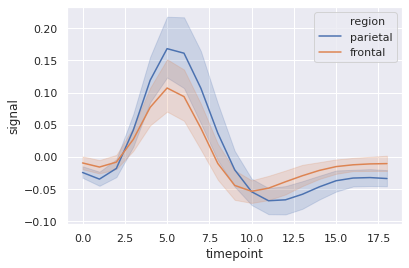

In [884]:
sns.lineplot('timepoint','signal',data=f,hue='region');

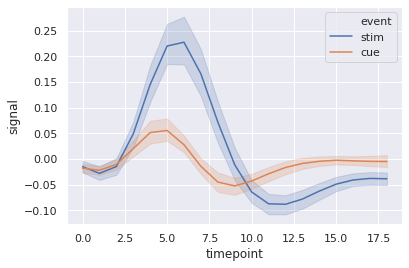

In [885]:
sns.lineplot('timepoint','signal',data=f,hue='event');

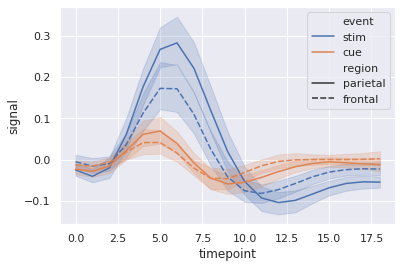

In [886]:
sns.lineplot('timepoint','signal',data=f,hue='event',style='region');

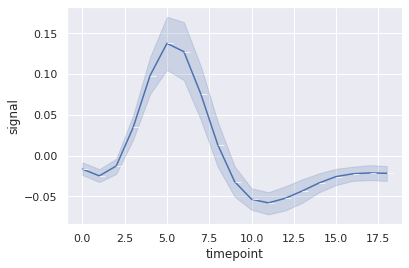

In [887]:
sns.lineplot('timepoint','signal',data=f,marker=True);

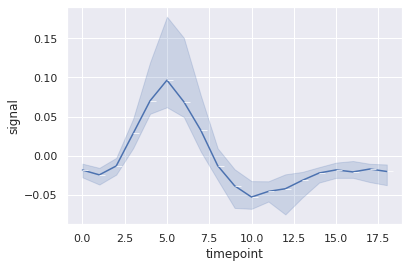

In [888]:
sns.lineplot('timepoint','signal',data=f,marker=True,estimator=np.median);

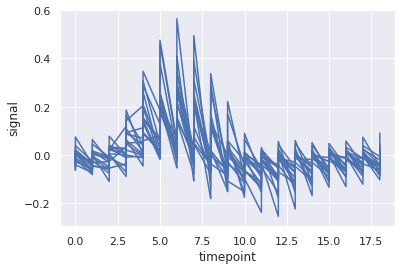

In [889]:
sns.lineplot('timepoint','signal',data=f,units='subject',estimator=None);

In [890]:
f_ = f[(f.region=='parietal')&(f.event=='cue')]

In [891]:
f_.head()

,subject,timepoint,event,region,signal
532,s3,4,cue,parietal,0.058219
533,s6,5,cue,parietal,0.038145
534,s7,5,cue,parietal,-0.008158
535,s8,5,cue,parietal,0.047136
536,s9,5,cue,parietal,0.055847


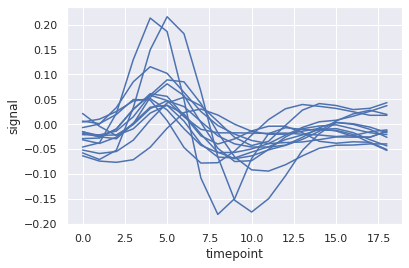

In [892]:
sns.lineplot('timepoint','signal',data=f_,units='subject',estimator=None);

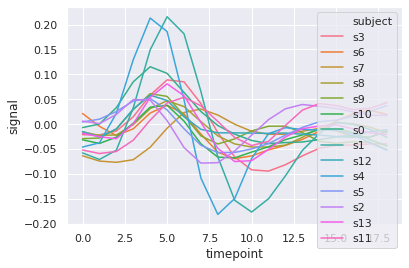

In [893]:
sns.lineplot('timepoint','signal',data=f_,hue='subject',estimator=None);

#### Plotting Covid data - Line Plots

In [894]:
df.drop('tt',axis=1,inplace=True)

In [895]:
df['date']=pd.to_datetime(df['date'])

In [896]:
df.set_index('date',inplace=True)

In [897]:
df = df[df['status']=='Confirmed']

In [898]:
df.drop('status',axis=1,inplace=True)

In [899]:
df = df.apply(pd.to_numeric)

In [900]:
df = df.rolling(7).mean()

In [901]:
df.reset_index(inplace=True)

In [902]:
df.head()

,date,an,ap,ar,as,br,ch,ct,dd,dl,dn,ga,gj,hp,hr,jh,jk,ka,kl,la,ld,mh,ml,mn,mp,mz,nl,or,pb,py,rj,sk,tg,tn,tr,un,up,ut,wb
0,2020-03-14,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2020-03-15,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2020-03-16,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2020-03-17,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2020-03-18,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [903]:
df_=pd.melt(df,id_vars='date',value_vars=list(df.columns).remove('date'),var_name='State',value_name='Confirmed')

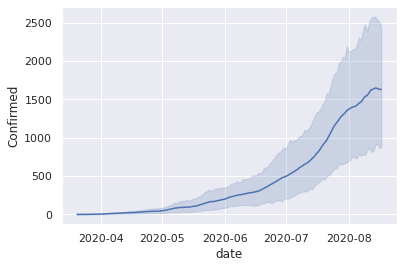

In [904]:
sns.lineplot('date','Confirmed',data = df_);

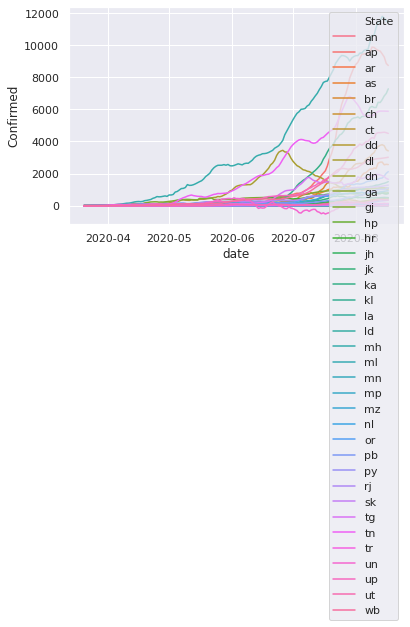

In [905]:
sns.lineplot('date','Confirmed',hue='State',data = df_);

In [906]:
states=['mh','tn','dl','ka','gj','wb']                                                                                                                      

In [907]:
df_=df_[df_.State.isin(states)]

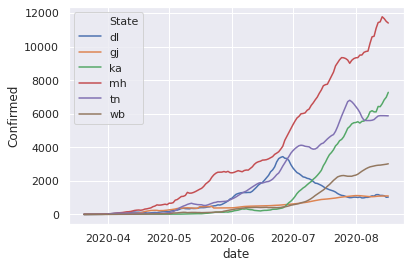

In [908]:
sns.lineplot('date','Confirmed',hue='State',data = df_);

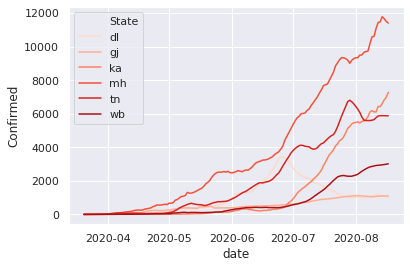

In [909]:
sns.lineplot('date','Confirmed',hue='State',data = df_,palette="Reds");

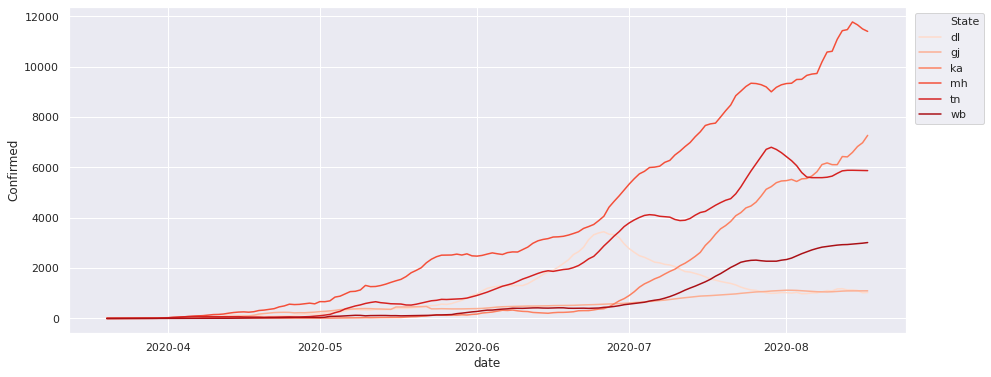

In [910]:
fig = plt.gcf()
fig.set_size_inches(15,6)
sns.lineplot('date','Confirmed',hue='State',data = df_,palette="Reds");
plt.legend(bbox_to_anchor = (1.1,1));

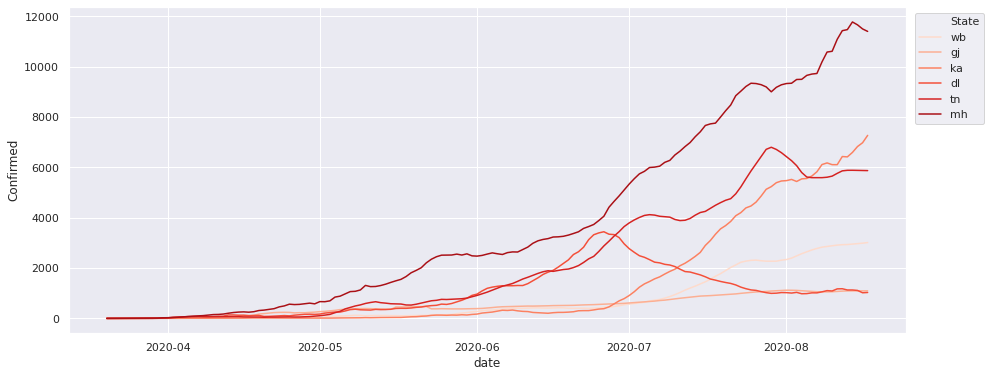

In [911]:
fig = plt.gcf()
fig.set_size_inches(15,6)
sns.lineplot('date','Confirmed',hue='State',data = df_,palette="Reds",hue_order=['wb','gj','ka','dl','tn','mh']);
plt.legend(bbox_to_anchor = (1.1,1));